In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree


In [52]:
df = pd.read_csv("car_data.csv")

df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [53]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [54]:
print("Rows in the dataset:", df.shape[0])
print("Columns in the dataset:", df.shape[1])

Rows in the dataset: 1000
Columns in the dataset: 5


In [55]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


# Copying the dataset

In [57]:
data = df.copy()

# Analysis the data

In [58]:
df_gender = df.groupby('Gender')['AnnualSalary'].mean()
df_gender

Gender
Female    74802.325581
Male      70435.950413
Name: AnnualSalary, dtype: float64

In [59]:
df_purchased = df.groupby('Gender')['Purchased'].mean()
df_purchased

Gender
Female    0.424419
Male      0.378099
Name: Purchased, dtype: float64

In [60]:
df_max = df.max()
df_max

User ID           1000
Gender            Male
Age                 63
AnnualSalary    152500
Purchased            1
dtype: object

In [61]:
df_min = df.min()
df_min

User ID              1
Gender          Female
Age                 18
AnnualSalary     15000
Purchased            0
dtype: object

In [62]:
df_female = df[df['Gender'] == 'Female']
len(df_female)

516

In [63]:
df_male = df[df['Gender'] == 'Male']
len(df_male)

484

In [64]:
df_purchase = df[df['Purchased']== 1]
df_p = len(df_purchase[df['AnnualSalary'] > df['AnnualSalary'].mean()].value_counts())
print("Number of people above average annual salary who purchased car:", df_p)

Number of people above average annual salary who purchased car: 265


/var/folders/pl/31m4mc2142l8k8t6nbprn2jm0000gn/T/ipykernel_66841/1808922977.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_p = len(df_purchase[df['AnnualSalary'] > df['AnnualSalary'].mean()].value_counts())


In [65]:
df_a = len(df_purchase[df['Age'] > df['Age'].mean()].value_counts())
print("Number of people above average age who purchased car:", df_a)

Number of people above average age who purchased car: 312


/var/folders/pl/31m4mc2142l8k8t6nbprn2jm0000gn/T/ipykernel_66841/4074247041.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_a = len(df_purchase[df['Age'] > df['Age'].mean()].value_counts())


# DATA VISUALIZATION


In [66]:
def plot_graph(x, y):
    plt.bar(df[x], df[y])
    X = x.upper()
    Y = y.upper()
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.title(f'{X} VS {Y}')
    plt.tight_layout()
    plt.show()

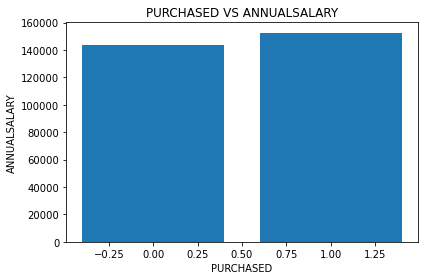

In [67]:
# AGE VS PURCHASED

plot_graph('Purchased', 'AnnualSalary')

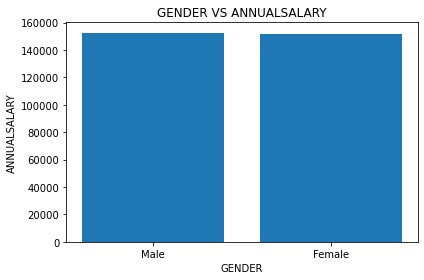

In [68]:
# GENDER VS ANNUALSALARY

plot_graph('Gender', 'AnnualSalary')

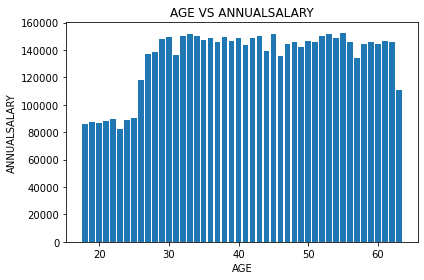

In [69]:
# AGE VS ANNUALSALARY

plot_graph('Age', 'AnnualSalary')

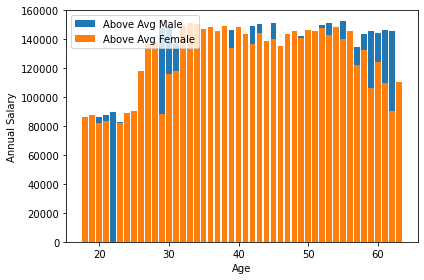

In [70]:
# Average salary
avg_male = df_male['AnnualSalary'].mean()
avg_female = df_female['AnnualSalary'].mean()

# Number of people with annual salary > average salary
Ab_Avg_male = df[(df['Gender']=='Male') & (df['AnnualSalary'] > avg_male)]
Ab_Avg_female = df[(df['Gender'] == "Female") & (df['AnnualSalary'] > avg_female)]

# Plotting a graph
plt.bar(Ab_Avg_male['Age'], Ab_Avg_male['AnnualSalary'], label='Above Avg Male')
plt.bar(Ab_Avg_female['Age'], Ab_Avg_female['AnnualSalary'], label='Above Avg Female')

plt.ylabel('Annual Salary')
plt.xlabel('Age')
plt.tight_layout()
plt.legend()
plt.show()

# OUTLIERS

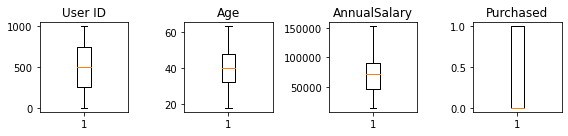

In [71]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 2))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

categorical_cols = df.columns[df.dtypes == object]
numberic_cols = [x for x in df.columns if x not in categorical_cols]
# Plot boxplots for each column
for i, column in enumerate(numberic_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(numberic_cols), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Feature Engineering

**Checking for missing values**

In [72]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

**Encoding the categorial column**

In [73]:
# Initialize the label encoder
encoder = LabelEncoder()

# Fitting the data
df['Gender'] = encoder.fit_transform(df['Gender'])

# Access the mapping of original labels to encoded values
label_map = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

label_map

{'Female': 0, 'Male': 1}

In [74]:
df.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
5,846,0,47,33500,1
6,219,0,46,132500,1
7,588,1,42,64000,0
8,85,0,30,84500,0
9,465,1,41,52000,0


<AxesSubplot:>

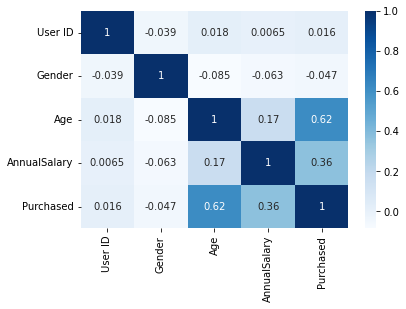

In [75]:
# correlation 
sns.heatmap(df.corr(), annot=True, cmap='Blues')

**From the above correlation map, UserId and Gender are the weakest feature. Hence, it is dropped.**

In [76]:
df = df.drop(['User ID', 'Gender'], axis=1)
df.columns

Index(['Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [77]:
# Splitting the data
X = df.drop(['Purchased'], axis=1)
Y = df['Purchased']

In [78]:
# Spliting the dataFrame into training and testing dataframe
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)

# Creating an object of DecisionTreeChassifier with gini index

In [79]:
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state = 0)
gini_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [80]:
# The maximum depth and number of nodes 
print("The depth of the model:",gini_model.tree_.max_depth)
print("Number of nodes:",gini_model.tree_.node_count)
print("Important Features:", gini_model.feature_importances_)

The depth of the model: 16
Number of nodes: 245
Important Features: [0.54816294 0.45183706]


In [81]:
y_test_pred = gini_model.predict(x_test)
y_train_pred = gini_model.predict(x_train)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [83]:
error_report = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)
error_report

,train,test
accuracy,0.992500,0.870000
precision,1.000000,0.842857
recall,0.981707,0.797297
f1,0.990769,0.819444


**The model perform better on the training set than on testing set. So, there is sign of overfitting**

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, gini_model.tree_.max_depth+1, 2),
              'max_features': range(1, len(gini_model.feature_importances_)+1)}

GR = GridSearchCV(tree.DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(x_train, y_train)

In [85]:
print("Number of the nodes:", GR.best_estimator_.tree_.node_count)
print("The depth:", GR.best_estimator_.tree_.max_depth)

Number of the nodes: 15
The depth: 3


In [86]:
Gr_y_test_prd = GR.predict(x_test)
Gr_y_train_prd = GR.predict(x_train)
GR_error_report = pd.concat([measure_error(y_train, Gr_y_train_prd, 'train'), measure_error(y_test, Gr_y_test_prd, 'test')], axis=1)

In [87]:
GR_error_report

,train,test
accuracy,0.903750,0.915000
precision,0.838275,0.835294
recall,0.948171,0.959459
f1,0.889843,0.893082


# Visualize Gini Decision-trees

[Text(0.4529887920298879, 0.9705882352941176, 'x[0] <= 44.5\ngini = 0.484\nsamples = 800\nvalue = [472, 328]'),
 Text(0.2475093399750934, 0.9117647058823529, 'x[1] <= 90750.0\ngini = 0.303\nsamples = 522\nvalue = [425, 97]'),
 Text(0.08779576587795766, 0.8529411764705882, 'x[1] <= 69750.0\ngini = 0.081\nsamples = 428\nvalue = [410, 18]'),
 Text(0.07783312577833126, 0.7941176470588235, 'gini = 0.0\nsamples = 254\nvalue = [254, 0]'),
 Text(0.09775840597758406, 0.7941176470588235, 'x[0] <= 36.5\ngini = 0.185\nsamples = 174\nvalue = [156, 18]'),
 Text(0.08779576587795766, 0.7352941176470589, 'gini = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(0.10772104607721046, 0.7352941176470589, 'x[1] <= 85500.0\ngini = 0.343\nsamples = 82\nvalue = [64, 18]'),
 Text(0.09775840597758406, 0.6764705882352942, 'x[1] <= 77250.0\ngini = 0.32\nsamples = 80\nvalue = [64, 16]'),
 Text(0.039850560398505604, 0.6176470588235294, 'x[1] <= 70500.0\ngini = 0.254\nsamples = 47\nvalue = [40, 7]'),
 Text(0.0199252801992

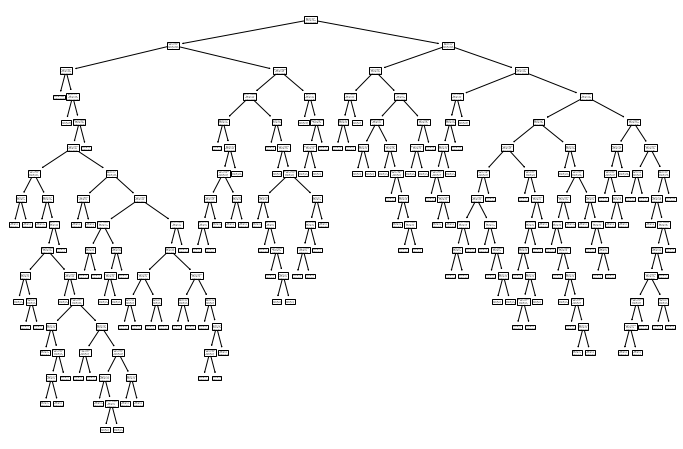

In [88]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(gini_model.fit(x_train, y_train)) 

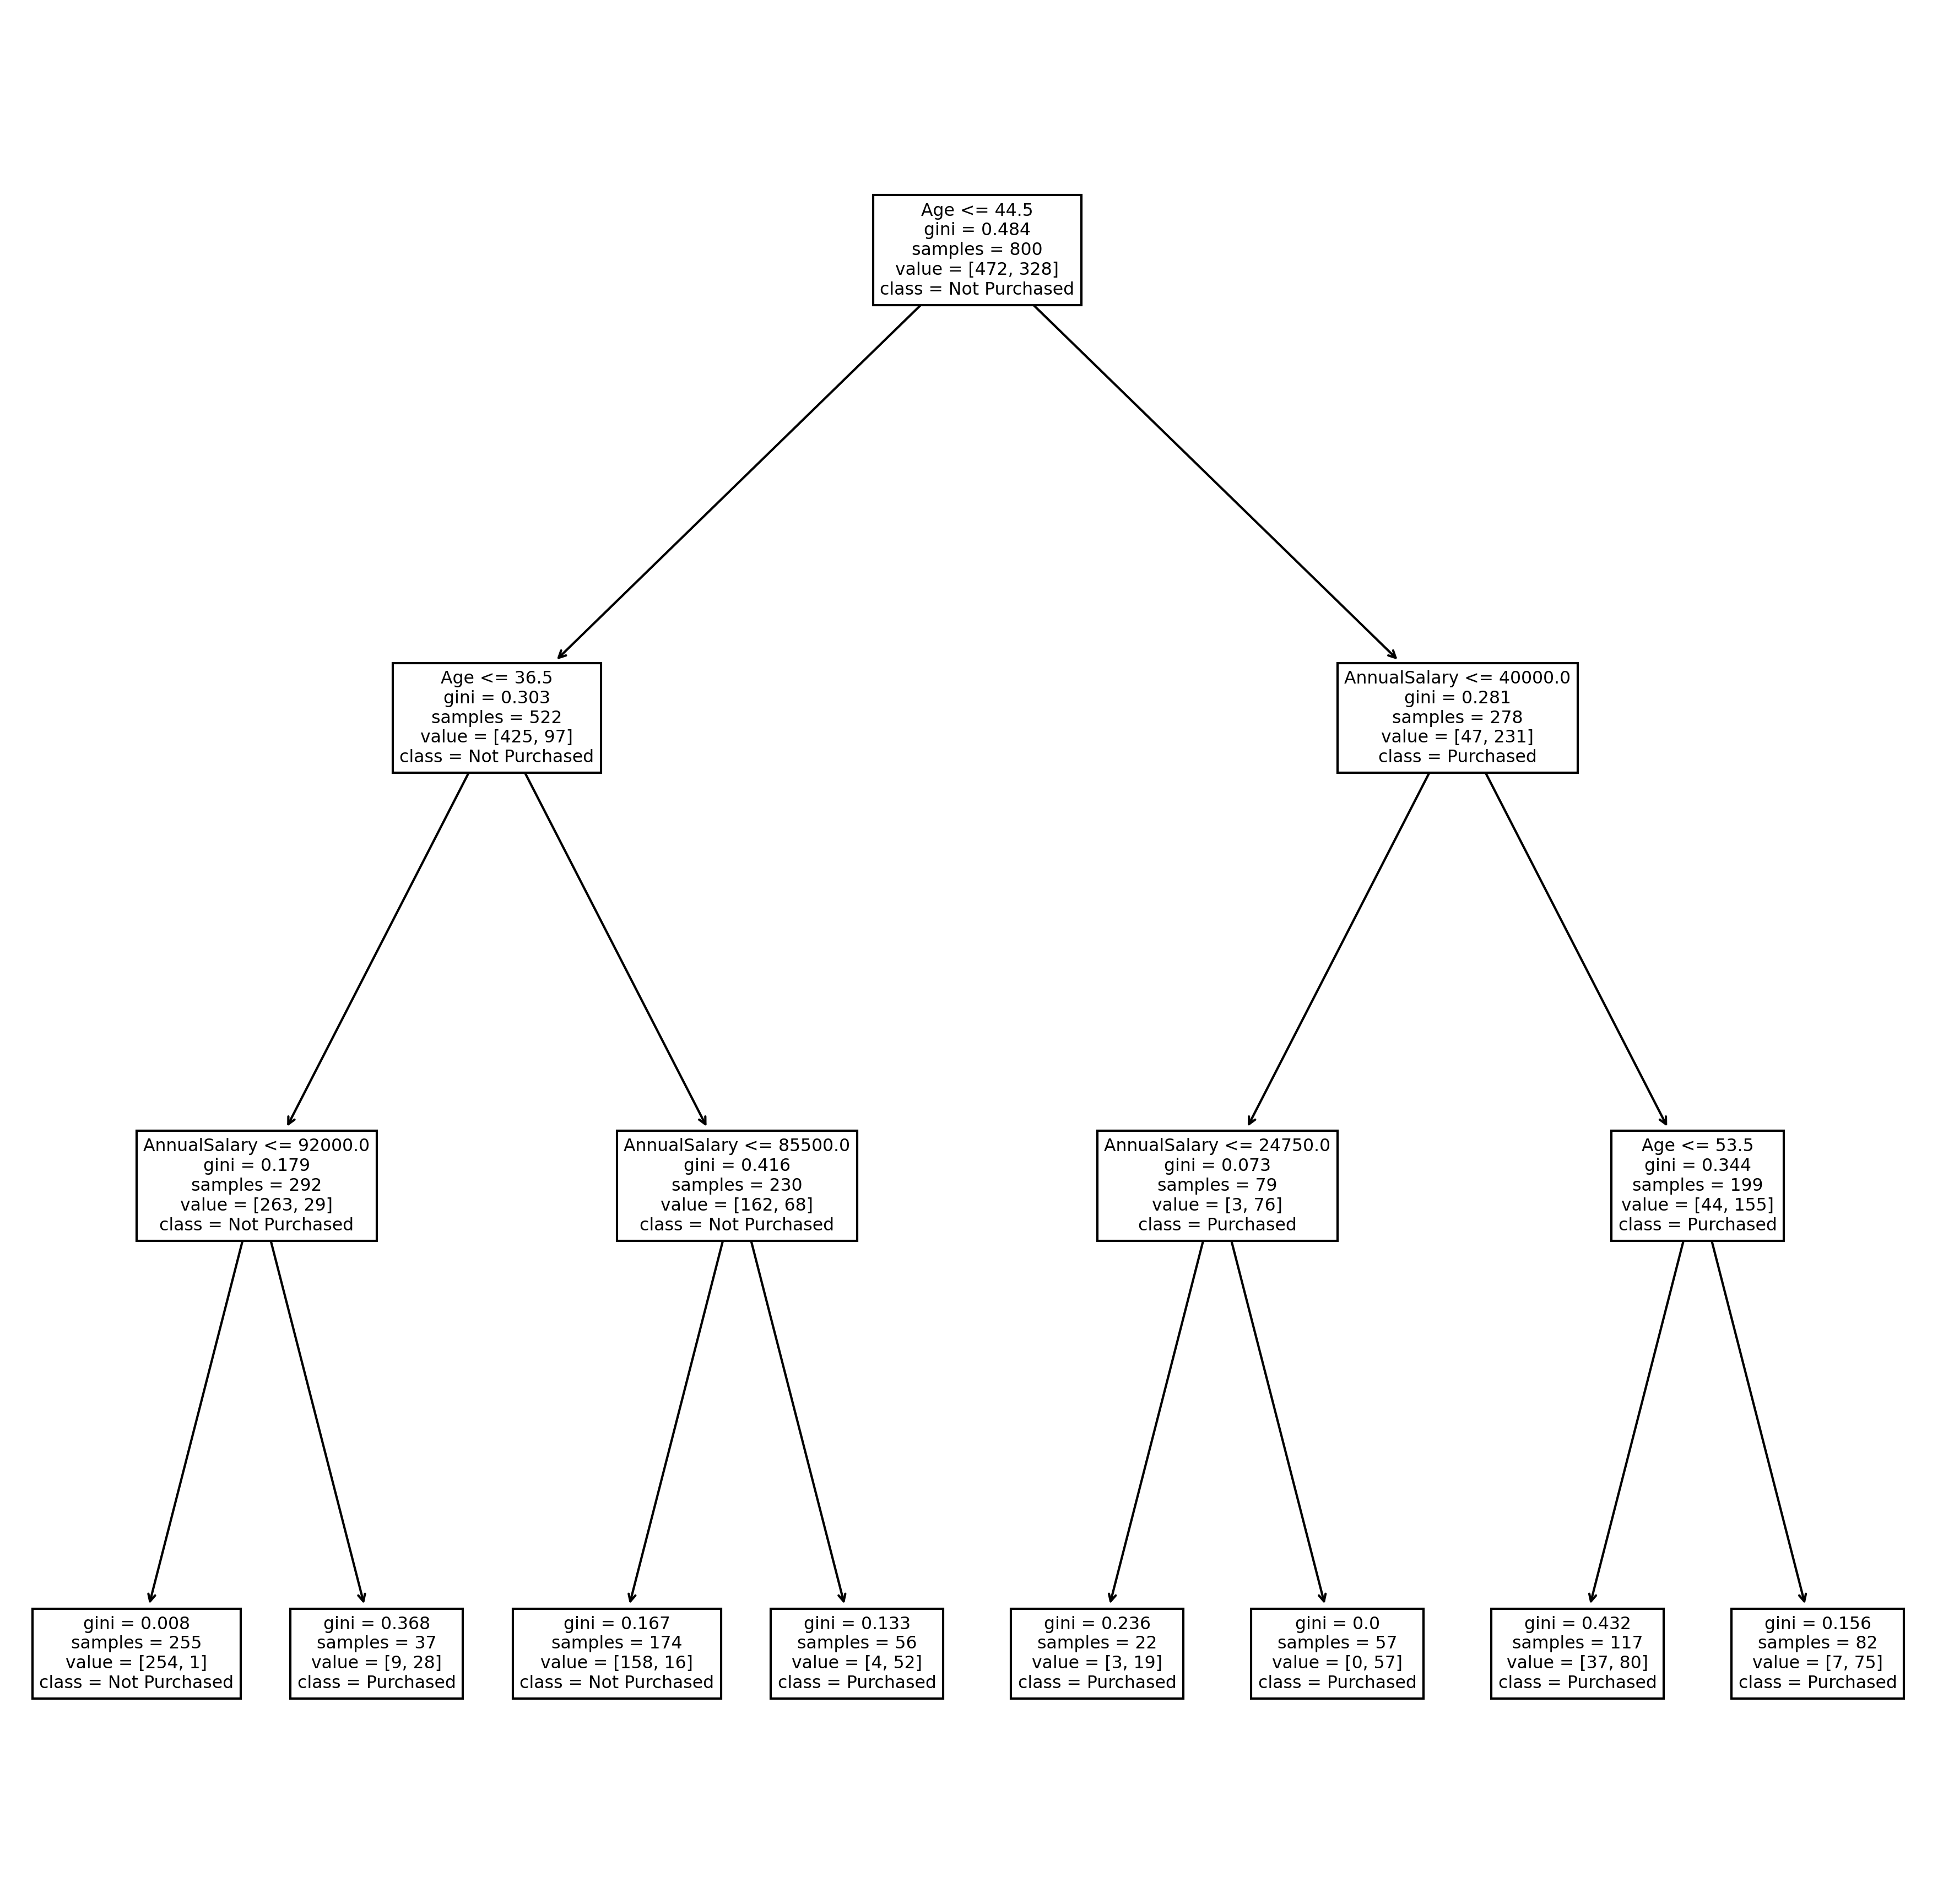

In [89]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15), dpi = 300)
tree.plot_tree(GR.best_estimator_, feature_names= x_train.columns, 
               class_names= ['Not Purchased', 'Purchased']);
fig.savefig('gini.png')

# Creating an object of DecisionTreeChassifier with entropy

In [90]:
entropy_model = tree.DecisionTreeClassifier(criterion= 'entropy', random_state=0)
entropy_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [91]:
print('Number of nodes:', entropy_model.tree_.node_count)
print('The depth:', entropy_model.tree_.max_depth)

Number of nodes: 235
The depth: 15


In [92]:
y_train_prd = entropy_model.predict(x_train)
y_test_prd = entropy_model.predict(x_test)

In [93]:
error_report = pd.concat([measure_error(y_train, y_train_prd, 'train'),
                              measure_error(y_test, y_test_prd, 'test')],
                              axis=1)
error_report

,train,test
accuracy,0.992500,0.870000
precision,1.000000,0.842857
recall,0.981707,0.797297
f1,0.990769,0.819444


In [94]:
param_grid = {'max_depth':range(1, gini_model.tree_.max_depth+1, 2),
              'max_features': range(1, len(gini_model.feature_importances_)+1)}

grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

grid = grid.fit(x_train, y_train)

In [95]:
print("Number of the nodes:", grid.best_estimator_.tree_.node_count)
print("The depth:", grid.best_estimator_.tree_.max_depth)

Number of the nodes: 15
The depth: 3


In [96]:
Gr_y_test_pred = grid.predict(x_test)
Gr_y_train_pred = grid.predict(x_train)
Grid_error_report = pd.concat([measure_error(y_train, Gr_y_train_pred, 'train'), measure_error(y_test, Gr_y_test_pred, 'test')], axis=1)

In [97]:
Grid_error_report

,train,test
accuracy,0.903750,0.915000
precision,0.838275,0.835294
recall,0.948171,0.959459
f1,0.889843,0.893082


# Visualize Entropy Decision-trees

[Text(0.47147979139504564, 0.96875, 'x[0] <= 44.5\nentropy = 0.977\nsamples = 800\nvalue = [472, 328]'),
 Text(0.2793350717079531, 0.90625, 'x[1] <= 90750.0\nentropy = 0.693\nsamples = 522\nvalue = [425, 97]'),
 Text(0.16101694915254236, 0.84375, 'x[1] <= 69750.0\nentropy = 0.252\nsamples = 428\nvalue = [410, 18]'),
 Text(0.15058670143415906, 0.78125, 'entropy = 0.0\nsamples = 254\nvalue = [254, 0]'),
 Text(0.1714471968709257, 0.78125, 'x[0] <= 36.5\nentropy = 0.48\nsamples = 174\nvalue = [156, 18]'),
 Text(0.16101694915254236, 0.71875, 'entropy = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(0.181877444589309, 0.71875, 'x[1] <= 85500.0\nentropy = 0.759\nsamples = 82\nvalue = [64, 18]'),
 Text(0.1714471968709257, 0.65625, 'x[0] <= 43.5\nentropy = 0.722\nsamples = 80\nvalue = [64, 16]'),
 Text(0.16101694915254236, 0.59375, 'x[1] <= 77250.0\nentropy = 0.748\nsamples = 75\nvalue = [59, 16]'),
 Text(0.07301173402868318, 0.53125, 'x[1] <= 70500.0\nentropy = 0.641\nsamples = 43\nvalue = [36, 7

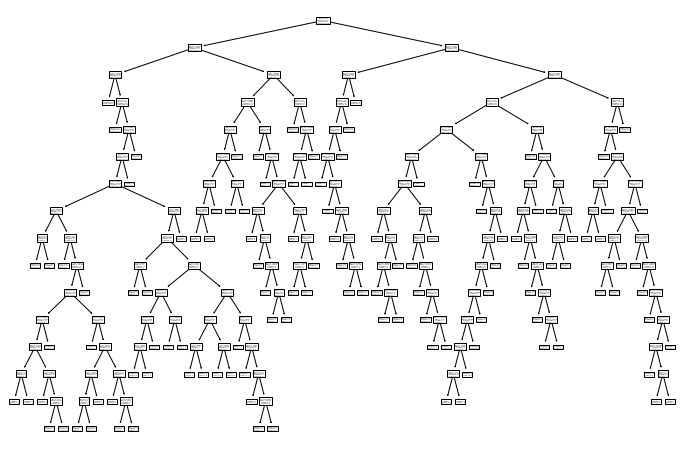

In [98]:
plt.figure(figsize=(12,8))


tree.plot_tree(entropy_model.fit(x_train, y_train)) 

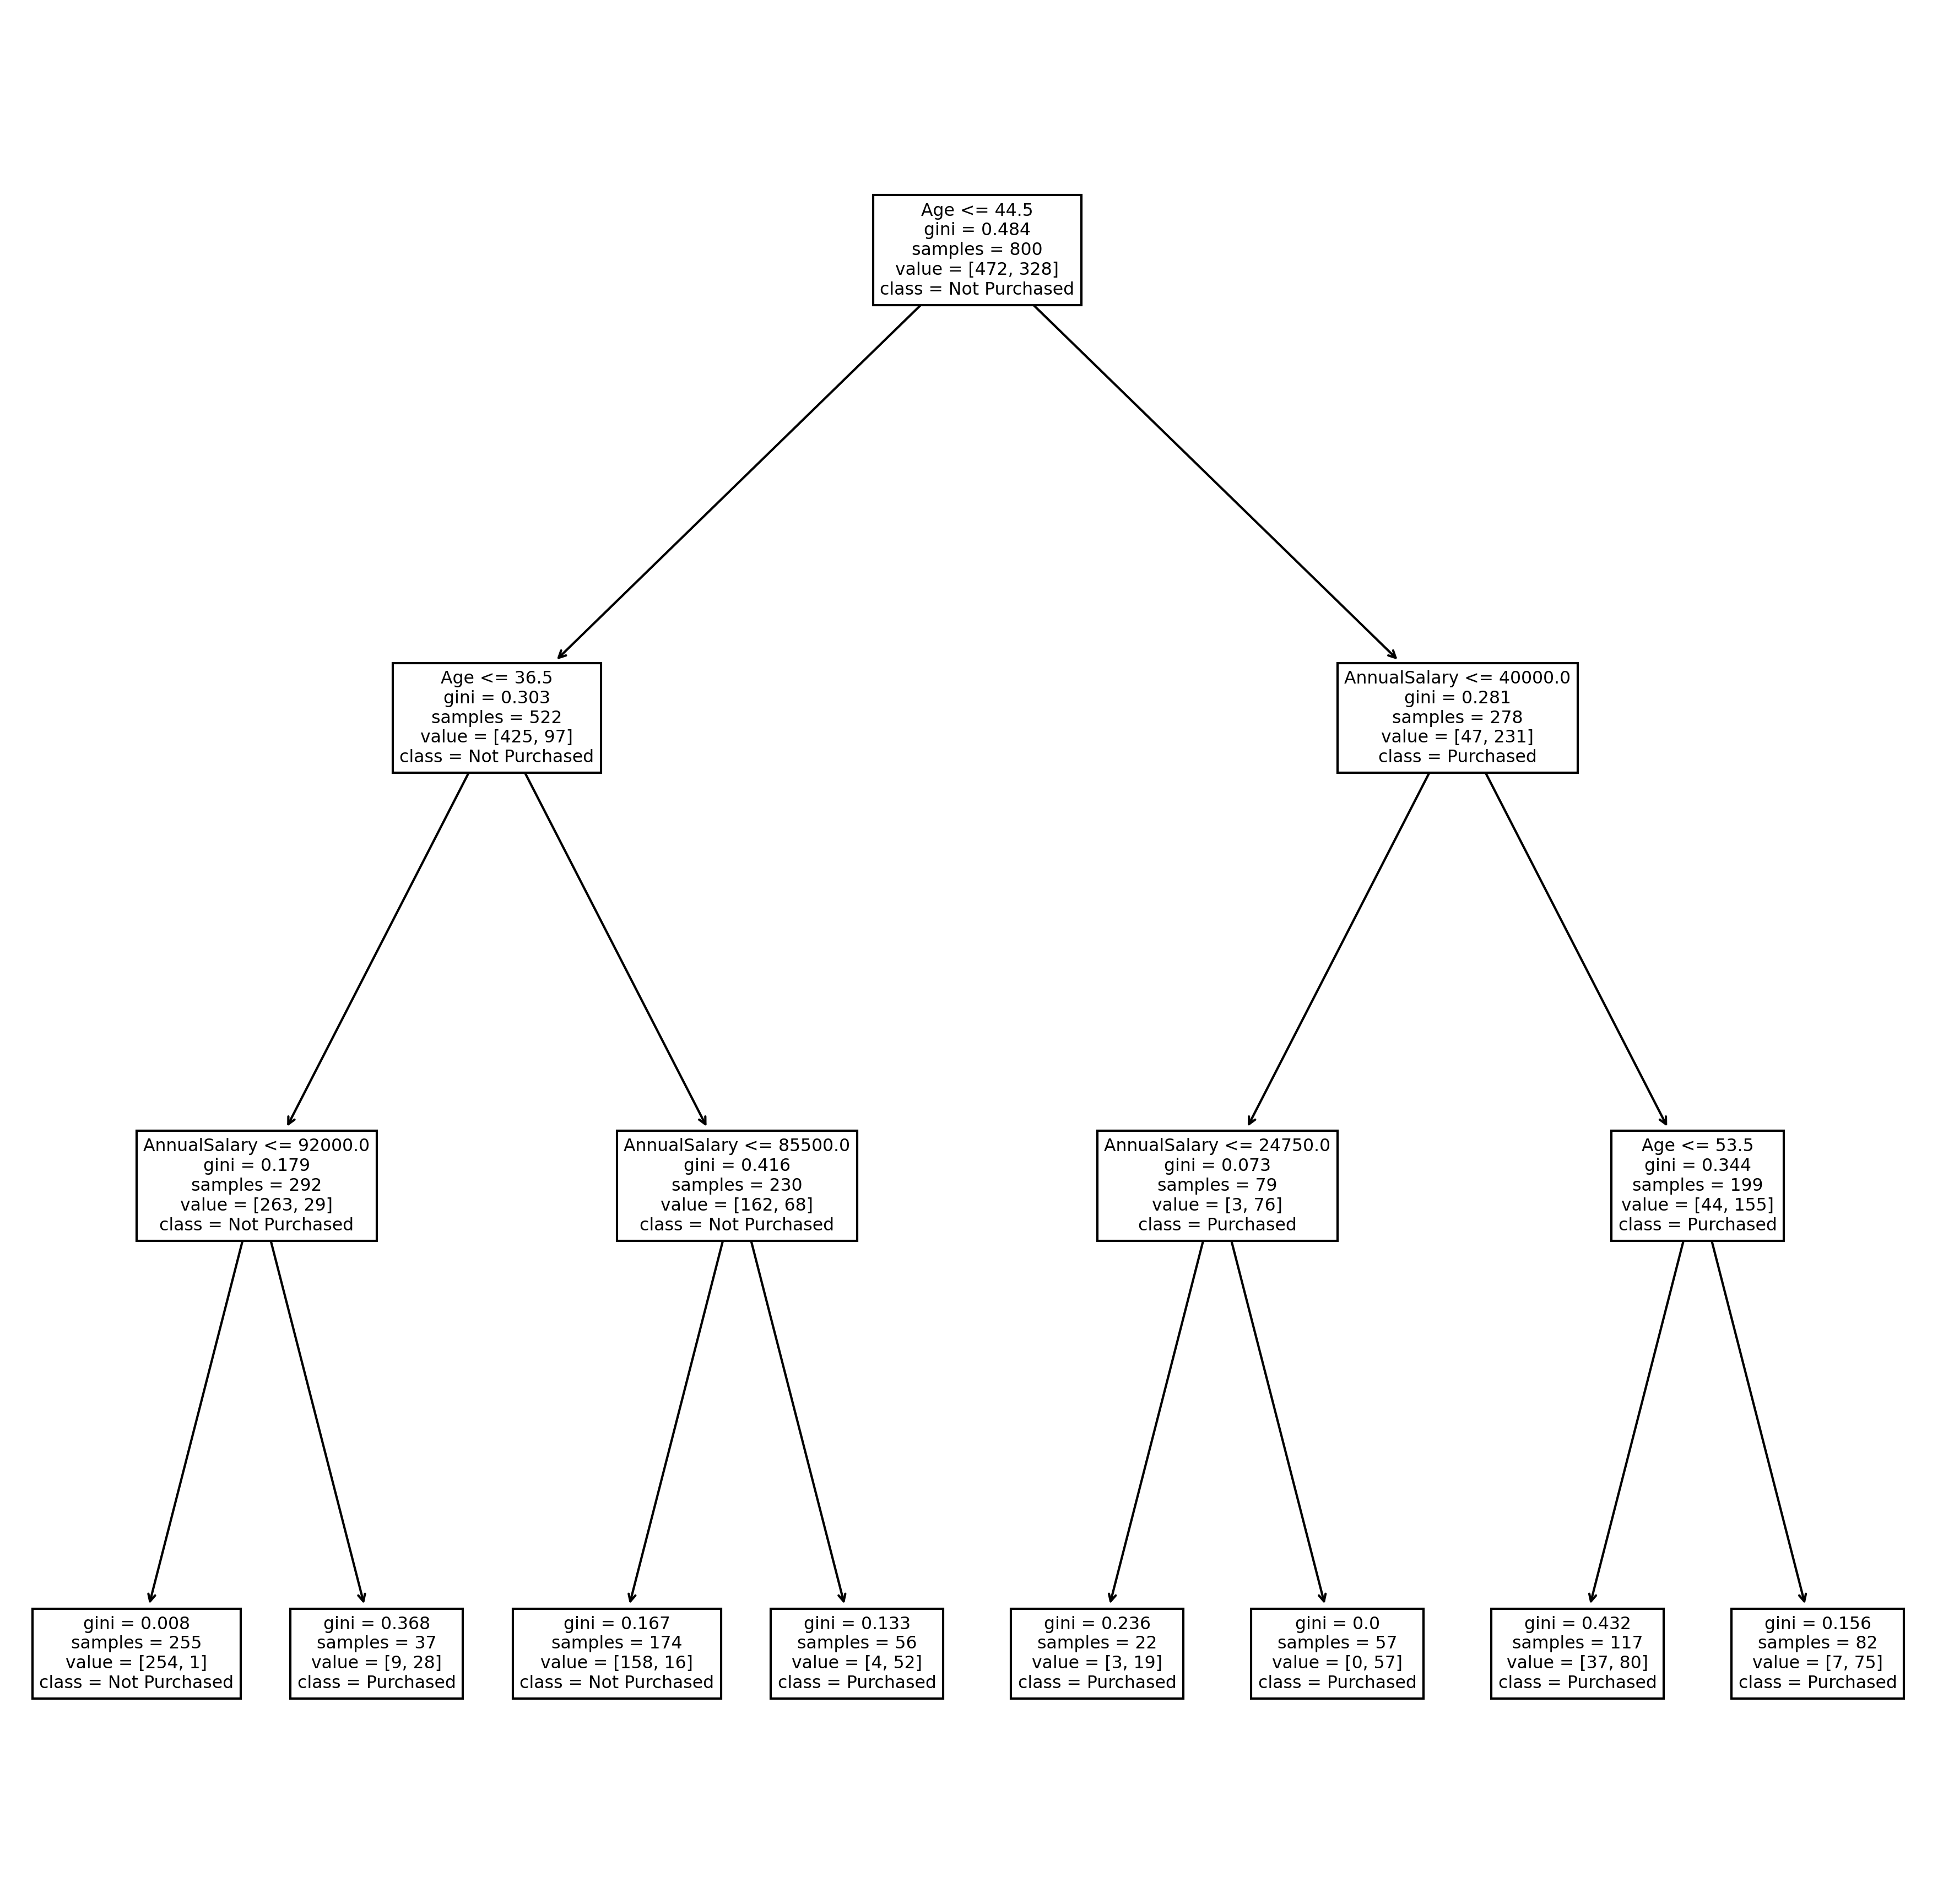

In [99]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15), dpi = 300)
tree.plot_tree(grid.best_estimator_, feature_names= x_train.columns, 
               class_names= ['Not Purchased', 'Purchased']);
fig.savefig('entropy.png')